In [1]:
# Import dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-23.615456760486282 -26.828016264499695
10.304942205659785 123.70982582208677
-77.36561206582724 134.63550761603477
80.09876966330938 6.508469218668239
20.64937576549228 -160.53865107998297
-0.43671647377280465 -99.77941905851313
54.51049051689151 31.53173617998874
-15.664011719728265 -7.951472588622124
-18.664779742502816 -37.56612829821168
-61.81749696861276 125.95586389991081
-52.0365654445916 5.254614667152055
37.40391184464946 -124.79831407637162
-65.53887704308785 34.561348275196366
19.7620859528585 -34.22445375357259
62.44890266056902 148.57517531777899
14.411725925654892 134.21934513629236
71.98966044159826 145.03366115199407
42.831534736541784 169.7115180913293
88.21718061429732 -134.51511458111085
40.846206378482975 77.46796443227908
-45.720431028573614 92.17582550953915
-47.699508583315776 -17.796465793662236
-28.39842832473517 -125.63698148808905
-23.922039578381842 141.93108788355266
44.08100672843861 -52.366671869572514
-15.59951981437338 103.77651650313345
-11.7463789129

73.2837311150978 124.53984703828155
74.83107064146449 117.23937949840598
-31.929015664210688 92.9844746890272
-44.941336105323785 -36.50880157851773
-72.90432921888714 -76.5707693809774
21.122691409434893 -58.101068030369916
-34.484626397968945 145.22157829753218
10.53882340606252 -43.03663577065021
-72.78970032402103 -92.72635321317038
28.329980875841642 59.728211331961774
-23.322568451636897 -73.64052561482096
42.48045564767398 -165.4165870573403
35.3319424870909 123.47417658799452
21.230518065746182 67.77492629318428
-28.740100549616884 79.4276723694303
13.133505952363635 55.378359833458205
54.3119139013387 -6.4406140472922
82.06744365351184 114.9545827733271
-52.74298232347162 33.03342792901657
60.856100225354936 -111.2120345508001
-0.5977063734087267 -3.853496384185263
16.829764257707353 84.18227030056545
77.18285929543416 -37.72865468032009
66.15942761880424 45.71719358377828
5.091730740267337 -89.74476374931604
-88.3986587807849 -63.126267057656875
18.05351039846576 39.210010629

84.94134891459058 27.399838451750668
-69.3783603677433 81.35956614762353
-47.02625490400793 -77.0587868779844
-26.181034320195337 -129.23714219183847
83.56073523635322 -170.0486399401314
-41.54342576188784 -129.16781488320754
-10.972035577610598 -155.53950928999583
-50.054110930042306 55.88451120237974
65.12620206680575 162.8343630030198
-54.24233999120662 -32.57541214395641
-62.800432558341214 175.0089133298976
87.89591095734917 -11.00303983954393
-9.790035386650004 156.5543645152742
-0.31430519791709344 -30.95992520971589
82.93981039585921 -64.77709694216787
82.83145749850121 9.511834145122464
-3.8418801072155446 173.14882940930585
70.84120112163168 -74.66700910884458
18.689932108705392 -5.236801013798953
-45.08605409952057 166.7497950826326
-42.57419513192893 66.47405504368993
-34.78288092696964 -68.01511873704398
-68.42854036824535 1.555346803349181
-83.88543879903523 75.4529065387018
-19.784557090710294 166.64362679447288
40.0957638110078 -155.41810245566353
-84.8429534289902 50.4

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

649

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | caravelas
Processing Record 2 of Set 1 | lanas
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | krasnyy
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | healdsburg
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | burkhala
City not found. Skipping...
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | kyzyl-suu
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | rikitea
Processing Record 2

Processing Record 38 of Set 4 | clyde river
Processing Record 39 of Set 4 | sydney
Processing Record 40 of Set 4 | santa isabel do rio negro
Processing Record 41 of Set 4 | katsuura
Processing Record 42 of Set 4 | cap malheureux
Processing Record 43 of Set 4 | wernigerode
Processing Record 44 of Set 4 | manaure
Processing Record 45 of Set 4 | juifang
City not found. Skipping...
Processing Record 46 of Set 4 | mahajanga
Processing Record 47 of Set 4 | homer
Processing Record 48 of Set 4 | san bernardo
Processing Record 49 of Set 4 | la asuncion
Processing Record 50 of Set 4 | billings
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | balaipungut
Processing Record 4 of Set 5 | qaqortoq
Processing Record 5 of Set 5 | nampula
Processing Record 6 of Set 5 | joshimath
Processing Record 7 of Set 5 | antofagasta
Processing Record 8 of Set 5 | kalmunai
Processing Record 9 of Set 5 | tuatapere
Processing Record 10 of Set 5 | qaanaaq
Proc

Processing Record 26 of Set 8 | ituni
City not found. Skipping...
Processing Record 27 of Set 8 | alvaraes
Processing Record 28 of Set 8 | surt
Processing Record 29 of Set 8 | lerwick
Processing Record 30 of Set 8 | cuza voda
Processing Record 31 of Set 8 | berlevag
Processing Record 32 of Set 8 | gairo
Processing Record 33 of Set 8 | longyearbyen
Processing Record 34 of Set 8 | pingshan
Processing Record 35 of Set 8 | ilulissat
Processing Record 36 of Set 8 | balsas
Processing Record 37 of Set 8 | oudtshoorn
Processing Record 38 of Set 8 | biak
Processing Record 39 of Set 8 | barguzin
Processing Record 40 of Set 8 | half moon bay
Processing Record 41 of Set 8 | tir pol
City not found. Skipping...
Processing Record 42 of Set 8 | mocuba
Processing Record 43 of Set 8 | songkhla
Processing Record 44 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 8 | ayan
Processing Record 46 of Set 8 | zaria
Processing Record 47 of Set 8 | laje
Processing Record 48 of Set 8

Processing Record 14 of Set 12 | barra
Processing Record 15 of Set 12 | enid
Processing Record 16 of Set 12 | iquique
Processing Record 17 of Set 12 | nylstroom
City not found. Skipping...
Processing Record 18 of Set 12 | emerald
Processing Record 19 of Set 12 | jacareacanga
Processing Record 20 of Set 12 | buraydah
Processing Record 21 of Set 12 | chikoy
City not found. Skipping...
Processing Record 22 of Set 12 | yingcheng
Processing Record 23 of Set 12 | nowy dwor gdanski
Processing Record 24 of Set 12 | huaraz
Processing Record 25 of Set 12 | kalmanka
Processing Record 26 of Set 12 | nadym
Processing Record 27 of Set 12 | la macarena
Processing Record 28 of Set 12 | aketi
Processing Record 29 of Set 12 | namatanai
Processing Record 30 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 31 of Set 12 | marawi
Processing Record 32 of Set 12 | vizinga
Processing Record 33 of Set 12 | yanan
City not found. Skipping...
Processing Record 34 of Set 12 | saint-denis
Processing

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Caravelas,-17.7125,-39.2481,72.64,93,56,4.94,BR,2022-06-01 01:28:27
1,Lanas,12.0495,121.9185,83.25,73,63,2.82,PH,2022-06-01 01:33:20
2,Hobart,-42.8794,147.3294,52.02,79,75,18.41,AU,2022-06-01 01:30:09
3,Kapaa,22.0752,-159.3190,82.38,77,20,12.66,US,2022-06-01 01:33:20
4,Puerto Ayora,-0.7393,-90.3518,72.30,91,62,8.70,EC,2022-06-01 01:24:52
5,Krasnyy,54.5678,31.4333,47.14,85,77,2.86,RU,2022-06-01 01:33:21
6,Jamestown,42.0970,-79.2353,74.84,58,0,1.99,US,2022-06-01 01:28:42
7,Albany,42.6001,-73.9662,73.85,83,60,3.69,US,2022-06-01 01:30:11
8,Cape Town,-33.9258,18.4232,53.11,88,0,5.75,ZA,2022-06-01 01:31:26
9,Healdsburg,38.6105,-122.8692,90.99,31,0,10.36,US,2022-06-01 01:33:21


In [12]:
# City data information
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        590 non-null    object 
 1   Lat         590 non-null    float64
 2   Lng         590 non-null    float64
 3   Max Temp    590 non-null    float64
 4   Humidity    590 non-null    int64  
 5   Cloudiness  590 non-null    int64  
 6   Wind Speed  590 non-null    float64
 7   Country     590 non-null    object 
 8   Date        590 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 41.6+ KB


In [13]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign city data df the new column order.
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Caravelas,BR,2022-06-01 01:28:27,-17.7125,-39.2481,72.64,93,56,4.94
1,Lanas,PH,2022-06-01 01:33:20,12.0495,121.9185,83.25,73,63,2.82
2,Hobart,AU,2022-06-01 01:30:09,-42.8794,147.3294,52.02,79,75,18.41
3,Kapaa,US,2022-06-01 01:33:20,22.0752,-159.3190,82.38,77,20,12.66
4,Puerto Ayora,EC,2022-06-01 01:24:52,-0.7393,-90.3518,72.30,91,62,8.70


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

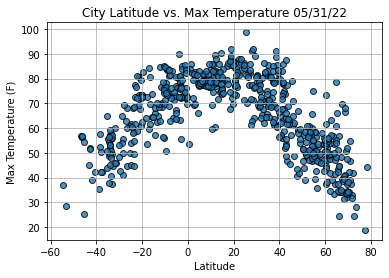

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

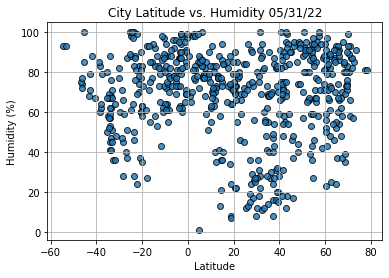

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

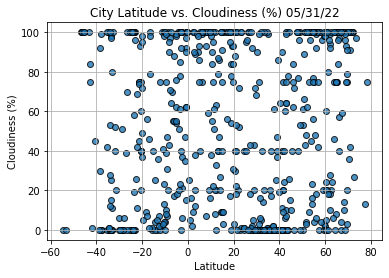

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

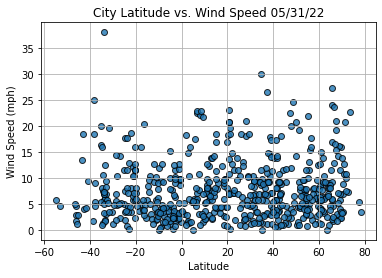

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                   Chokurdakh
Country                        RU
Date          2022-06-01 01:33:23
Lat                       70.6333
Lng                      147.9167
Max Temp                     54.7
Humidity                       58
Cloudiness                     91
Wind Speed                   6.96
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Lanas,PH,2022-06-01 01:33:20,12.0495,121.9185,83.25,73,63,2.82
3,Kapaa,US,2022-06-01 01:33:20,22.0752,-159.3190,82.38,77,20,12.66
5,Krasnyy,RU,2022-06-01 01:33:21,54.5678,31.4333,47.14,85,77,2.86
6,Jamestown,US,2022-06-01 01:28:42,42.0970,-79.2353,74.84,58,0,1.99
7,Albany,US,2022-06-01 01:30:11,42.6001,-73.9662,73.85,83,60,3.69


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

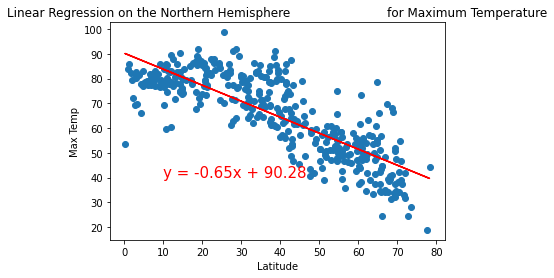

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

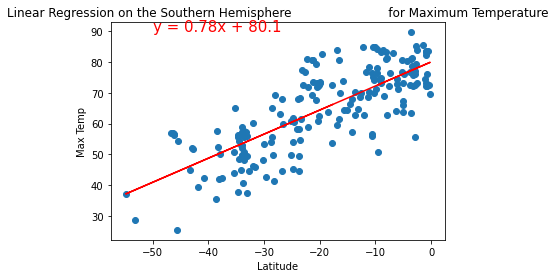

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

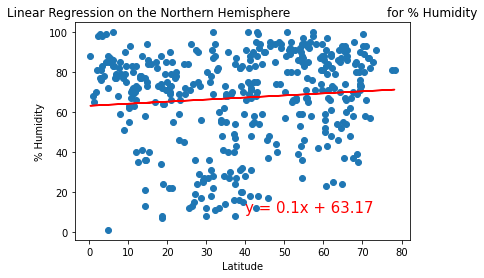

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

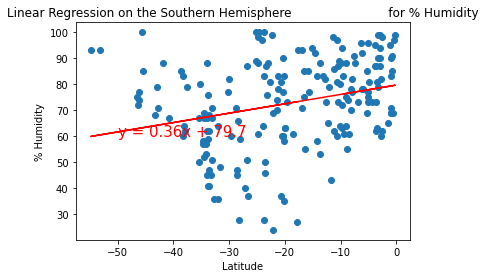

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,60))

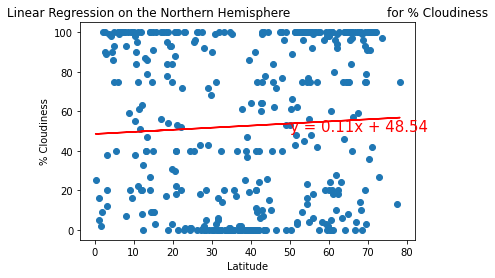

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,50))

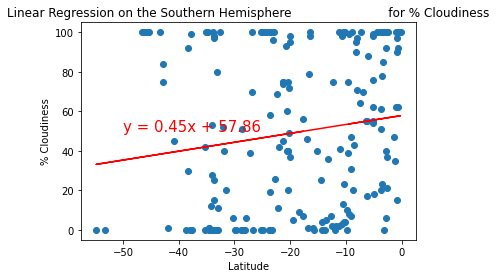

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,50))

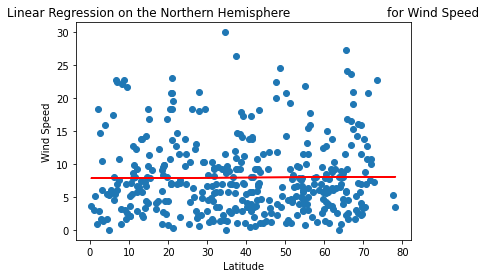

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

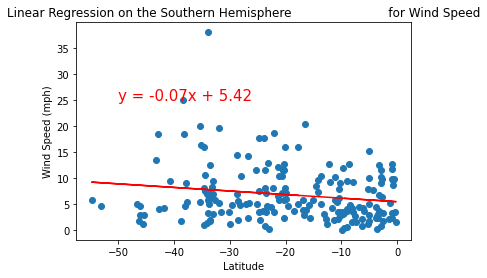

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-50,25))